In [26]:
import numpy as np
import matplotlib.pyplot as plt

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

# Document Options
params = {'font.size' : 18,                   # Set font size to 11pt
    'axes.labelsize': 18,               # -> axis labels
    'legend.fontsize': 18,              # -> legends
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'font.family': 'serif',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{babel}'
        )
    }
plt.rcParams.update(params) 

In [ ]:
# EDA for the testhall EBC dataset

import matplotlib.pyplot as plt

dataset_dir = '../Data'
dataset_name = 'ADSDataPoints_copy.xlsx'

filepath = os.path.join(dataset_dir, dataset_name)
df = pd.read_excel(filepath, engine='openpyxl')
points = df.iloc[226:339,0].dropna()
points.drop(points[points.str.contains("mirror")].index, inplace=True)

plist = points.tolist()

# convert datapoint names to class labels
hum_labels = ['Humidity' if 'Hum' in x else x for x in plist]
temp_labels = ['Temperature' if 'Temp' in x else x for x in hum_labels]
pressure_labels = ['Pressure' if 'Pressure' in x else x for x in temp_labels]
valve_labels = ['Flap / Valve' if 'Valve' in x else x for x in pressure_labels]
speed_labels = ['Speed' if 'Speed' in x else x for x in valve_labels]
oper_labels = ['Operating' if 'Operating' in x else x for x in speed_labels]
vol_labels = ['Volume' if 'Vol' in x else x for x in oper_labels]
control_labels = ['Control Mode' if 'ContMode' in x else x for x in vol_labels]
error_labels = ['Error' if 'Error' in x else x for x in control_labels]
flap_labels = ['Flap / Valve' if 'Flap' in x else x for x in error_labels]
power_labels = ['Power' if 'Power' in x else x for x in flap_labels]

substances = ['Humidity', 'Temperature', 'Pressure', 'Flap / Valve', 'Speed', 'Operating', 'Volume', 'Control Mode', 'Error', 'Power']
clean_labels = [x for x in power_labels if not x.startswith("//")]
other_labels = [x for x in clean_labels if x not in substances]
clean_labels = ['Other' if x not in substances else x for x in clean_labels]
print(list(set(clean_labels)))


lseries = pd.Series(clean_labels)

# plot bar chart of frequency counts of datapoints grouped by measured substance
fig = plt.figure(figsize=(18, 10))
ax = lseries.value_counts().plot.bar()
ax.set_xlabel('Measured substance', fontsize=18, labelpad=20)
ax.set_ylabel('Number of datapoints', fontsize=18, labelpad=20)
plt.xticks(fontsize = 16)
plt.yticks(range(0, 21, 2), fontsize = 18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.gcf().set_facecolor('white')

# plt.savefig('Figures/testhall_sensortype_counts.png', bbox_inches='tight', dpi=300)

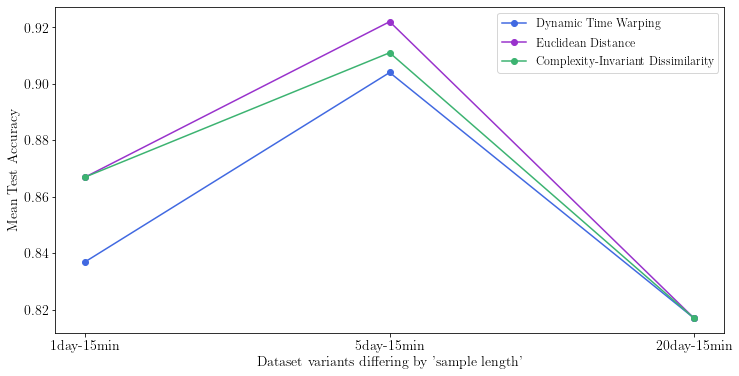

In [2]:
# Classification Accuracy plots --> with Distance & Sampling combinations

# importing package 
import matplotlib.pyplot as plt 
import numpy as np 

# Set the figure size to stretch the x-axis width
plt.figure(figsize=(12, 6))  # Adjust width and height

# Set font size for all text in the figure
plt.rc('font', size=12)  # Adjust the font size
  
# create data 
x = ["1day-15min", "5day-15min", "20day-15min"] 
y_cid = [0.867, 0.911, 0.817]
y_euc = [0.867, 0.922, 0.817]
y_dtw = [0.837, 0.904, 0.817] 
  
# plot lines with markers
plt.plot(x, y_dtw, label="Dynamic Time Warping", marker='o', color='royalblue') 
plt.plot(x, y_euc, label="Euclidean Distance", marker='o', color='darkorchid') 
plt.plot(x, y_cid, label="Complexity-Invariant Dissimilarity", marker='o', color='mediumseagreen') 

# Add axis labels
plt.xlabel("Dataset variants differing by `sample length'")
plt.ylabel("Mean Test Accuracy")

plt.legend(loc="upper right", fontsize='medium') 

plt.gcf().set_facecolor('white')

plt.savefig('Figures/gnn_accuracy_sampling.png', bbox_inches='tight', dpi=300)

plt.show()

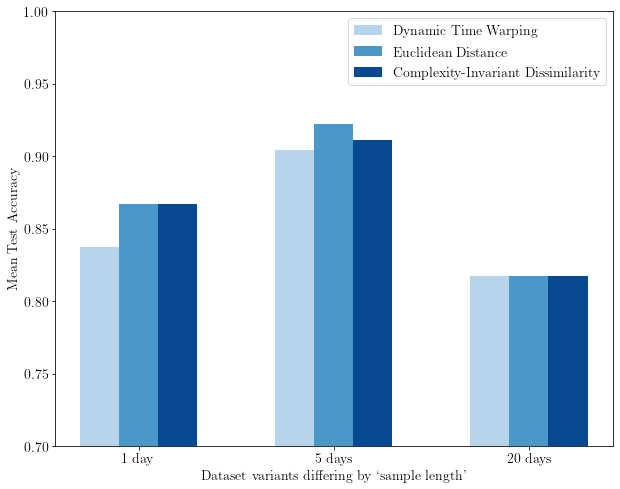

In [25]:
# importing package 
import matplotlib.pyplot as plt 
import numpy as np 
  
# create data 
x = ["1 day", "5 days", "20 days"] 
y_cid = [0.867, 0.911, 0.817]
y_euc = [0.867, 0.922, 0.817]
y_dtw = [0.837, 0.904, 0.817] 

# Number of categories
N = len(y_cid)
# Create index for the x-axis categories
ind = np.arange(N)
width = 0.20

# Set the figure size to stretch the x-axis width
fig, ax = plt.subplots(figsize=(10, 8))

# Create a colormap
cmap = plt.get_cmap('Blues')

# Plot the bars
dtw_bars = ax.bar(ind - width, y_dtw, width, label="Dynamic Time Warping", color=cmap(0.3))
euc_bars = ax.bar(ind, y_euc, width, label="Euclidean Distance", color=cmap(0.6))
cid_bars = ax.bar(ind + width, y_cid, width, label="Complexity-Invariant Dissimilarity", color=cmap(0.9))

# Add labels, title, and legend
ax.set_xlabel("Dataset variants differing by `sample length'")
ax.set_ylabel('Mean Test Accuracy')
ax.set_xticks(ind)
ax.set_xticklabels(x)
ax.legend()

# Set y-axis limit and ticks
ax.set_ylim(0.7, 1.0)
ax.set_yticks(np.arange(0.7, 1.02, 0.05))
ax.tick_params(axis='both')

plt.gcf().set_facecolor('white')
plt.savefig('Figures/gnn_accuracy_sampling.pdf', bbox_inches='tight', dpi=500)
plt.show()

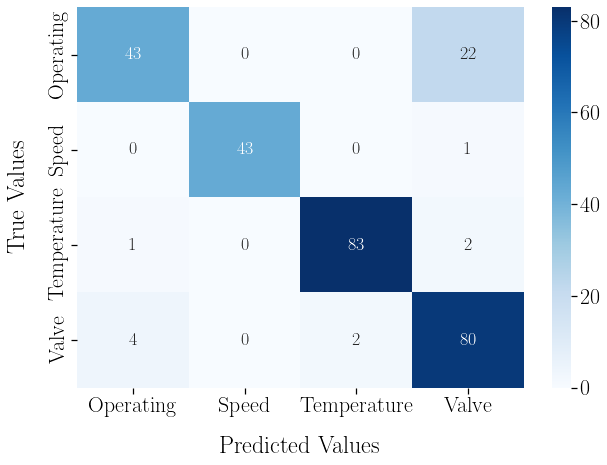

In [12]:
import seaborn as sns
import pandas as pd

data = pd.read_csv('/home/vaibhavs/Master_Thesis/ma-vaibhav/Code/SimTSC/logs/simtsc_log_1_shot3_0.3/AHU_principal_2023_stanscaler_SimTSC_euc_confusion_mat.csv', index_col=0)

plt.figure(figsize=(10, 7))

# Set the font scale for label size
sns.set_context("notebook", font_scale=2.0)
sns.heatmap(data, annot=True, annot_kws={"size": 18}, cmap="Blues")
# Set labels for x-axis and y-axis with additional padding
plt.xlabel('Predicted Values', labelpad=20)
plt.ylabel('True Values', labelpad=20)

# Save the figure with white background and high DPI
plt.savefig('Figures/gnn_confusion_matrix_bigfont.png', bbox_inches='tight', dpi=500)

plt.show()


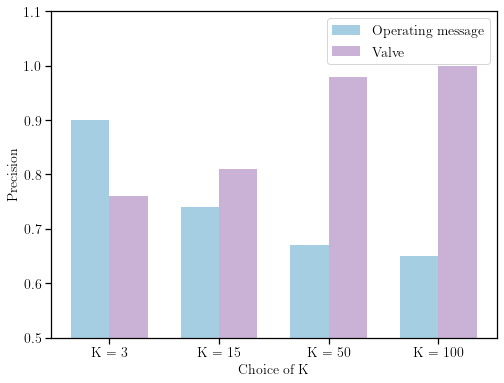

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Dummy data
oper_prec = [0.90, 0.74, 0.67, 0.65]
valve_prec = [0.76, 0.81, 0.98, 1.0]

oper_recall = [0.66, 0.77, 1.0, 1.0]
valve_recall = [0.93, 0.81, 0.64, 0.64]

# Number of categories
N = len(oper_prec)

# Create index for the x-axis categories
ind = np.arange(N)

# Width of each bar
width = 0.35

# Document Options
params = {'font.size' : 14,                   # Set font size to 11pt
    'axes.labelsize': 14,               # -> axis labels
    'legend.fontsize': 14,              # -> legends
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.family': 'serif',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{babel}'
        )
    }
plt.rcParams.update(params) 

# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.preamble'] = [
#     r'\usepackage{amsmath}',
#     r'\usepackage{amssymb}']
# matplotlib.rcParams['font.family'] = 'serif'
# matplotlib.rcParams['font.serif'] = 'Times New Roman'

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bars
oper_bars = ax.bar(ind, oper_prec, width, label='Operating message', color='#a6cee3')
rec_bars = ax.bar(ind + width, valve_prec, width, label='Valve', color='#cab2d6')

# Add labels, title, and legend
ax.set_xlabel('Choice of K')
ax.set_ylabel('Precision')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('K = 3', 'K = 15', 'K = 50', 'K = 100'))
ax.legend()

# Set y-axis limit and ticks
ax.set_ylim(0.5, 1.0)
ax.set_yticks(np.arange(0.5, 1.1, 0.1))
ax.tick_params(axis='both')

# Save the figure with white background and high DPI
plt.gcf().set_facecolor('white')
plt.savefig('Figures/K_precision_pdf.pdf', bbox_inches='tight', dpi=500)

# Show the plot
plt.show()

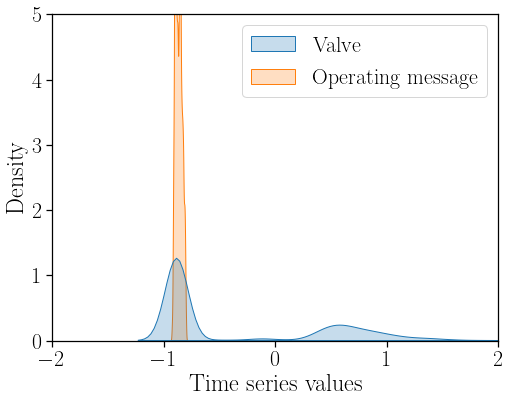

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

dataset_dir = './SimTSC/datasets/EBC'
dataset_name = 'AHU_principal_2023_stanscaler'
dataset_dir = os.path.join(dataset_dir, dataset_name)
df_train = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_TRAIN.tsv'), sep='\t', header=None)
y_train = df_train[df_train.columns[0]].astype(np.str)
X_train = df_train[df_train.columns[1:]].astype(np.float32)
# X_train = df_train.drop(columns=[0]).astype(np.float32)

valve_rows = df_train[df_train.iloc[:,0].str.contains('Valve')]
# valveact_rows = df_train[df_train.iloc[:,0].str.contains('ValveAct')]
oper_rows = df_train[df_train.iloc[:,0].str.contains('Operating')]
valves = valve_rows.drop(columns=[0]).astype(np.float32)
# valveact = valveact_rows.drop(columns=[0]).astype(np.float32)
operating = oper_rows.drop(columns=[0]).astype(np.float32)

valves = valves.to_numpy()
# valveact = valveact.to_numpy()
operating = operating.to_numpy()
# reduce length of longer array to match array lengths
min_len = min([valves.shape[0], operating.shape[0]])
valves = valves[0:min_len,:]
# valveact = valveact[0:min_len,:]
operating = operating[0:min_len,:]
# if valves.shape[0] > operating.shape[0]:
#     valves = valves[0:operating.shape[0],:]
# else:    
#     operating = operating[0:valves.shape[0],:] 

valves_flat = valves.flatten()
# valveact_flat = valveact.flatten()
operating_flat = operating.flatten()
data = pd.DataFrame({'Valve': valves_flat, 'Operating message': operating_flat})

# Plot KDE plot
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(data=data, fill=True)
# plt.title('Kernel Density Estimation (KDE) Plot')
plt.xlabel('Time series values')
plt.ylabel('Density')
# Set x-axis and y-axis limits<
ax.set_xlim(-2, 2) 
ax.set_ylim(0, 5) 

# Save the figure with white background and high DPI
plt.gcf().set_facecolor('white')
plt.savefig('Figures/KDE_valve_operating.png', bbox_inches='tight', dpi=500)
plt.show()

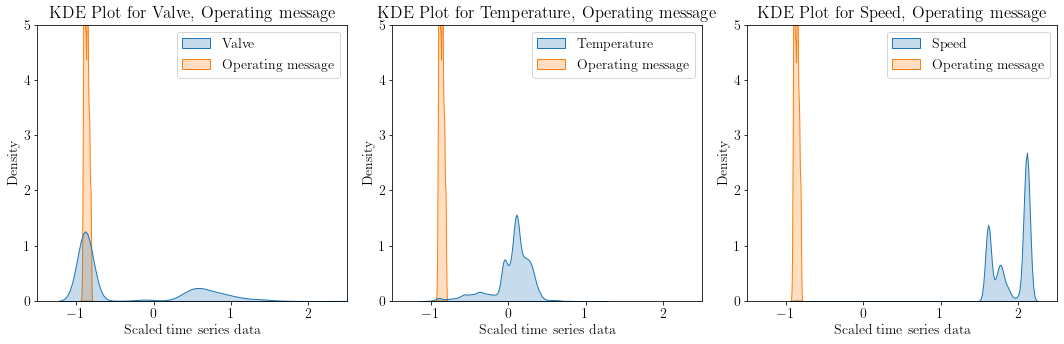

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

dataset_dir = './SimTSC/datasets/EBC'
dataset_name = 'AHU_principal_2023_stanscaler'
dataset_dir = os.path.join(dataset_dir, dataset_name)
df_train = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_TRAIN.tsv'), sep='\t', header=None)
y_train = df_train[df_train.columns[0]].astype(np.str)
X_train = df_train[df_train.columns[1:]].astype(np.float32)
# X_train = df_train.drop(columns=[0]).astype(np.float32)

valve_rows = df_train[df_train.iloc[:,0].str.contains('Valve')]
# valveact_rows = df_train[df_train.iloc[:,0].str.contains('ValveAct')]
oper_rows = df_train[df_train.iloc[:,0].str.contains('Operating')]
temp_rows = df_train[df_train.iloc[:,0].str.contains('Temp')]
speed_rows = df_train[df_train.iloc[:,0].str.contains('Speed')]

valves = valve_rows.drop(columns=[0]).astype(np.float32)
operating = oper_rows.drop(columns=[0]).astype(np.float32)
temps = temp_rows.drop(columns=[0]).astype(np.float32)
speed = speed_rows.drop(columns=[0]).astype(np.float32)

valves = valves.to_numpy()
operating = operating.to_numpy()
temps = temps.to_numpy()
speed = speed.to_numpy()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#####  VALVE <--> OPERATING

# reduce length of longer array to match array lengths
min_len = min([valves.shape[0], operating.shape[0]])
valves = valves[0:min_len,:]
operating = operating[0:min_len,:]

valves_flat = valves.flatten()
operating_flat = operating.flatten()
data = pd.DataFrame({'Valve': valves_flat, 'Operating message': operating_flat})

sns.kdeplot(data=data, fill=True, ax=axes[0])
axes[0].set_title('KDE Plot for Valve, Operating message')
axes[0].set_xlabel('Scaled time series data')
axes[0].set_xlim(-1.5, 2.5) 
axes[0].set_ylim(0, 5) 

#####  TEMP <--> OPERATING

# reduce length of longer array to match array lengths
min_len = min([temps.shape[0], operating.shape[0]])
temps = temps[0:min_len,:]
operating = operating[0:min_len,:]

temps_flat = temps.flatten()
operating_flat = operating.flatten()
data = pd.DataFrame({'Temperature': temps_flat, 'Operating message': operating_flat})

sns.kdeplot(data=data, fill=True, ax=axes[1])
axes[1].set_title('KDE Plot for Temperature, Operating message')
axes[1].set_xlabel('Scaled time series data')
axes[1].set_xlim(-1.5, 2.5) 
axes[1].set_ylim(0, 5) 

#####  SPEED <--> OPERATING

# reduce length of longer array to match array lengths
min_len = min([speed.shape[0], operating.shape[0]])
speed = speed[0:min_len,:]
operating = operating[0:min_len,:]

speed_flat = speed.flatten()
operating_flat = operating.flatten()
data = pd.DataFrame({'Speed': speed_flat, 'Operating message': operating_flat})

sns.kdeplot(data=data, fill=True, ax=axes[2])
axes[2].set_title('KDE Plot for Speed, Operating message')
axes[2].set_xlabel('Scaled time series data')
axes[2].set_xlim(-1.5, 2.5) 
axes[2].set_ylim(0, 5) 

# # Plot KDE plot
# plt.figure(figsize=(8, 6))
# ax = sns.kdeplot(data=data, fill=True)
# plt.title('Kernel Density Estimation (KDE) Plot')
# plt.xlabel('Time series values')
plt.ylabel('Density')
# Set x-axis and y-axis limits<
# ax.set_xlim(-2, 2) 
# ax.set_ylim(0, 5) 

# Adjust layout
plt.tight_layout()

# Save the figure with white background and high DPI
plt.gcf().set_facecolor('white')
plt.savefig('Figures/KDE_all.pdf', bbox_inches='tight', dpi=500)
plt.show()

In [92]:
import colorsys

color1 = '#cab2d6'
color2 = '#a6cee3'

# Convert hex color codes to RGB
color1_rgb = tuple(int(color1.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))
color2_rgb = tuple(int(color2.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))

# Convert RGB to HSL
color1_hsl = colorsys.rgb_to_hls(*[x / 255.0 for x in color1_rgb])
color2_hsl = colorsys.rgb_to_hls(*[x / 255.0 for x in color2_rgb])

# Adjust saturation and lightness to make the colors more visible/bright
adjusted_color1_hsl = (color1_hsl[0], min(1, color1_hsl[1] + 0.1), min(1, color1_hsl[2] + 0.1))
adjusted_color2_hsl = (color2_hsl[0], min(1, color2_hsl[1] + 0.1), min(1, color2_hsl[2] + 0.1))

# Convert adjusted HSL back to RGB
adjusted_color1_rgb = tuple(round(x * 255) for x in colorsys.hls_to_rgb(*adjusted_color1_hsl))
adjusted_color2_rgb = tuple(round(x * 255) for x in colorsys.hls_to_rgb(*adjusted_color2_hsl))

# Convert RGB back to hex
adjusted_color1_hex = '#{:02x}{:02x}{:02x}'.format(*adjusted_color1_rgb)
adjusted_color2_hex = '#{:02x}{:02x}{:02x}'.format(*adjusted_color2_rgb)

print("Adjusted Color 1:", adjusted_color1_hex)
print("Adjusted Color 2:", adjusted_color2_hex)


Adjusted Color 1: #e2d0eb
Adjusted Color 2: #c9e4f3


In [ ]:
# Example data generation
np.random.seed(0)
n = 100  # Number of samples per class
m = 50   # Number of values per sample
class1_data = np.random.normal(loc=0, scale=1, size=(n, m))
class2_data = np.random.normal(loc=2, scale=1, size=(n, m))
class1_data.shape

# # Flatten the data for plotting
# class1_flat = class1_data.flatten()
# class2_flat = class2_data.flatten()

# # Combine data into a DataFrame
# data = pd.DataFrame({'Class 1': class1_flat, 'Class 2': class2_flat})

# # Plot KDE plot
# sns.kdeplot(data=data, fill=True)
# plt.title('Kernel Density Estimation (KDE) Plot')
# plt.xlabel('Time Series Values')
# plt.ylabel('Density')
# plt.legend(title='Class')
# plt.show()

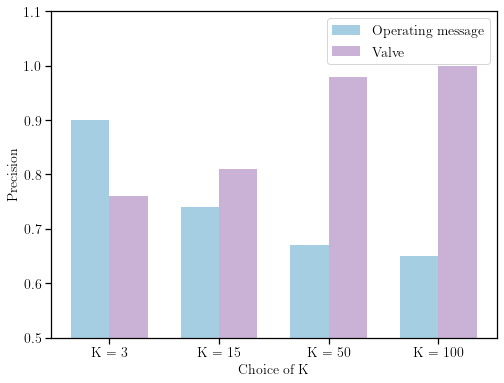

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Dummy data
oper_prec = [0.90, 0.74, 0.67, 0.65]
valve_prec = [0.76, 0.81, 0.98, 1.0]

oper_recall = [0.66, 0.77, 1.0, 1.0]
valve_recall = [0.93, 0.81, 0.64, 0.64]

# Number of categories
N = len(oper_prec)

# Create index for the x-axis categories
ind = np.arange(N)

# Width of each bar
width = 0.35

# Document Options
params = {'font.size' : 14,                   # Set font size to 11pt
    'axes.labelsize': 14,               # -> axis labels
    'legend.fontsize': 14,              # -> legends
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'font.family': 'serif',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{babel}'
        )
    }
plt.rcParams.update(params) 

# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.preamble'] = [
#     r'\usepackage{amsmath}',
#     r'\usepackage{amssymb}']
# matplotlib.rcParams['font.family'] = 'serif'
# matplotlib.rcParams['font.serif'] = 'Times New Roman'

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bars
oper_bars = ax.bar(ind, oper_prec, width, label='Operating message', color='#a6cee3')
rec_bars = ax.bar(ind + width, valve_prec, width, label='Valve', color='#cab2d6')

# Add labels, title, and legend
ax.set_xlabel('Choice of K')
ax.set_ylabel('Precision')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('K = 3', 'K = 15', 'K = 50', 'K = 100'))
ax.legend()

# Set y-axis limit and ticks
ax.set_ylim(0.5, 1.0)
ax.set_yticks(np.arange(0.5, 1.1, 0.1))
ax.tick_params(axis='both')

# Save the figure with white background and high DPI
plt.gcf().set_facecolor('white')
plt.savefig('Figures/K_precision_pdf.pdf', bbox_inches='tight', dpi=500)

# Show the plot
plt.show()

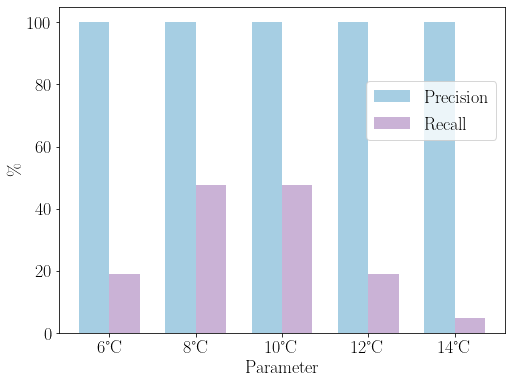

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Dummy data
phoda_prec = [100.0, 100.0, 100.0, 100.0, 100.0]
phoda_recall = [19.05, 47.62, 47.62, 19.05, 4.76]

# Number of categories
N = len(phoda_prec)

# Create index for the x-axis categories
ind = np.arange(N)

# Width of each bar
width = 0.35

# # Document Options
# params = {'font.size' : 14,                   # Set font size to 11pt
#     'axes.labelsize': 14,               # -> axis labels
#     'legend.fontsize': 14,              # -> legends
#     'xtick.labelsize': 14,
#     'ytick.labelsize': 14,
#     'font.family': 'serif',
#     'text.usetex': True,
#     'text.latex.preamble': (            # LaTeX preamble
#         r'\usepackage{babel}'
#         )
#     }
# plt.rcParams.update(params) 

# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.preamble'] = [
#     r'\usepackage{amsmath}',
#     r'\usepackage{amssymb}']
# matplotlib.rcParams['font.family'] = 'serif'
# matplotlib.rcParams['font.serif'] = 'Times New Roman'

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bars
oper_bars = ax.bar(ind, phoda_prec, width, label='Precision', color='#a6cee3')
rec_bars = ax.bar(ind + width, phoda_recall, width, label='Recall', color='#cab2d6')

# Add labels, title, and legend
ax.set_xlabel('Parameter')
ax.set_ylabel('\%')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('6°C', '8°C', '10°C', '12°C', '14°C'))

# Move legend down and keep inside plot
leg = ax.legend(loc='upper right', bbox_to_anchor=(1, 0.8))

# Set y-axis limit and ticks
ax.set_ylim(0.0, 105.0)
ax.set_yticks(np.arange(0.0, 101.0, 20.0))
ax.tick_params(axis='both')

# Set caption position and text
# fig_text = plt.figtext(0.5, -0.05, '(a)', ha='center', va='bottom')  # Adjust position as needed

# Save the figure with white background and high DPI
plt.gcf().set_facecolor('white')
plt.savefig('Figures/Rule_ODA_PH_parameter.pdf', bbox_inches='tight', dpi=500)

# Show the plot
plt.show()

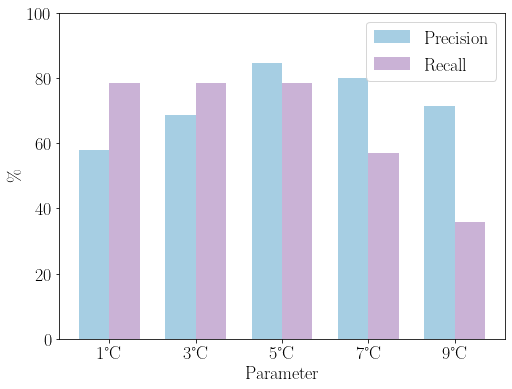

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Dummy data
phoda_prec = [57.89, 68.75, 84.62, 80.00, 71.43]
phoda_recall = [78.57, 78.57, 78.57, 57.14, 35.71]

# Number of categories
N = len(phoda_prec)

# Create index for the x-axis categories
ind = np.arange(N)

# Width of each bar
width = 0.35

# # Document Options
# params = {'font.size' : 14,                   # Set font size to 11pt
#     'axes.labelsize': 14,               # -> axis labels
#     'legend.fontsize': 14,              # -> legends
#     'xtick.labelsize': 14,
#     'ytick.labelsize': 14,
#     'font.family': 'serif',
#     'text.usetex': True,
#     'text.latex.preamble': (            # LaTeX preamble
#         r'\usepackage{babel}'
#         )
#     }
# plt.rcParams.update(params) 

# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.preamble'] = [
#     r'\usepackage{amsmath}',
#     r'\usepackage{amssymb}']
# matplotlib.rcParams['font.family'] = 'serif'
# matplotlib.rcParams['font.serif'] = 'Times New Roman'

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bars
oper_bars = ax.bar(ind, phoda_prec, width, label='Precision', color='#a6cee3')
rec_bars = ax.bar(ind + width, phoda_recall, width, label='Recall', color='#cab2d6')

# Add labels, title, and legend
ax.set_xlabel('Parameter')
ax.set_ylabel('\%')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1°C', '3°C', '5°C', '7°C', '9°C'))
ax.legend(loc='upper right')

# Move legend down and keep inside plot
# leg = ax.legend(loc='upper right', bbox_to_anchor=(1, 0.8))

# Set y-axis limit and ticks
ax.set_ylim(0.0, 100.0)
ax.set_yticks(np.arange(0.0, 101.0, 20.0))
ax.tick_params(axis='both')

# Set caption position and text
# fig_text = plt.figtext(0.5, -0.05, '(a)', ha='center', va='bottom')  # Adjust position as needed

# Save the figure with white background and high DPI
plt.gcf().set_facecolor('white')
plt.savefig('Figures/Rule_delta_ODA_parameter.pdf', bbox_inches='tight', dpi=500)

# Show the plot
plt.show()

In [15]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))